# NHÓM THAAN

- Nguyễn Thị Tuyết Ngân - K214051252
- Lê Như Ái - K214142052
- Võ Nguyễn Bảo Hân - K214142065
- Ngô Thị Minh Trinh - K214142093
- Hồ Phạm Hữu - K214142067

# PHÂN TÍCH TÍN DỤNG KHÁCH HÀNG SỬU DỤNG DỮ LIỆU VAY VỐN

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.impute import SimpleImputer,KNNImputer
from datasist.structdata import detect_outliers
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import cohen_kappa_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 

%matplotlib inline

# Load and Read Data

In [186]:
# đọc file csv vào một dfFrame
df = pd.read_csv("final2.csv", sep=",")
# hiển thị dfFrame
df


,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,7/12/1986,4/7/2016,C10003,A,COM0000002,C,1.0,3500.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/1982,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,...,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,30/01/89,9/7/2016,C10477,C,COM0004143,A,4.0,3500.0,...,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,...,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69713,APPU90955789628,Female,31/07/83,30/09/16,C10006,A,COM0000010,A,1.0,4900.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,10,0
69714,APPV80989824738,Female,27/01/71,30/09/16,C10116,C,COM0045789,A,4.0,7190.1,...,N,S122,G,1450.0,NaN,NaN,NaN,NaN,7,0
69715,APPW50697209842,Female,1/2/1992,30/09/16,C10022,B,COM0013284,C,4.0,1600.0,...,Y,S122,G,0.0,24000.0,4.0,35.50,943.0,2,0
69716,APPY50870035036,Male,27/06/78,30/09/16,C10002,A,COM0000098,C,3.0,9893.0,...,Y,S122,G,1366.0,80000.0,5.0,NaN,NaN,10,0


# Data Cleaning

Handling Duplicated Data


In [187]:
#XỦ LÍ CÁC DÒNG TRÙNG LẶP
#Tìm các dòng trùng lặp
duplicated_rows = df[df.duplicated()]
print(duplicated_rows)

#Xóa các dòng trùng lặp
df=df.drop_duplicates()

#Kiểm tra lại các dòng trùng lặp
duplicated_rows2 = df[df.duplicated()]

#Hiển thị kết quả
print('Kết quả sau khi lọc dữ liệu trùng lặp:', duplicated_rows2)

                    ID  Gender       DOB Lead_Creation_Date City_Code  \
457    APPG60994436641    Male  19/04/85           20/07/16    C10002   
871    APPI60777907008    Male  31/07/92           1/7/2016    C10001   
8973   APPI60777907008    Male  31/07/92           1/7/2016    C10001   
46802  APPY80286387418  Female  3/5/1978           13/07/16    C10003   
56014  APPV10589141519    Male  21/05/91           16/09/16    C10002   

      City_Category Employer_Code Employer_Category1  Employer_Category2  \
457               A    COM0001781                  A                 4.0   
871               A    COM0039056                  B                 4.0   
8973              A    COM0039056                  B                 4.0   
46802             A    COM0046236                  A                 4.0   
56014             A    COM0026862                  B                 4.0   

       Monthly_Income  ... Contacted Source Source_Category Existing_EMI  \
457           10000.0  ...  

Handling missing values


In [188]:
#TÌM MISSING VALUE
# Tính tổng giá trị bị thiếu trong mỗi cột
total_missing = df.isnull().sum()

# Tính phần trăm giá trị bị thiếu trong mỗi cột
percent_missing = (total_missing / len(df)) * 100

# Tạo dataframe mới chứa thông tin giá trị bị thiếu và phần trăm tương ứng
missing_df = pd.concat([total_missing, percent_missing], axis=1)
missing_df.columns = ["Total Missing", "Percent Missing"]

# In ra dataframe mới
print(missing_df)

                                     Total Missing  Percent Missing
ID                                               0         0.000000
Gender                                           0         0.000000
DOB                                             15         0.021517
Lead_Creation_Date                               0         0.000000
City_Code                                      814         1.167644
City_Category                                  814         1.167644
Employer_Code                                 4018         5.763631
Employer_Category1                            4018         5.763631
Employer_Category2                            4298         6.165278
Monthly_Income                                   0         0.000000
Customer_Existing_Primary_Bank_Code           9391        13.470945
Primary_Bank_Type                             9391        13.470945
Contacted                                        0         0.000000
Source                                          

In [189]:
#XỬ LÝ MISSING VALUE
#Xóa dòng chứa null value trong DOB
df = df.dropna(subset=['DOB'])

#Category Feature
df["City_Code"].fillna(df["City_Code"].mode()[0],inplace=True)                            
df["City_Category"].fillna(df["City_Category"].mode()[0],inplace=True)              
df["Employer_Code"].fillna(df["Employer_Code"].mode()[0],inplace=True) 
df["Employer_Category1"].fillna(df["Employer_Category1"].mode()[0],inplace=True)                            
df["Customer_Existing_Primary_Bank_Code"].fillna(df["Customer_Existing_Primary_Bank_Code"].mode()[0],inplace=True)              
df["Primary_Bank_Type"].fillna(df["Primary_Bank_Type"].mode()[0],inplace=True) 

#Numerical Feature
df["Employer_Category2"].fillna(df["Employer_Category2"].median(),inplace=True)
df["Existing_EMI"].fillna(df["Existing_EMI"].median(),inplace=True)                          
df["Loan_Amount"].fillna(df["Loan_Amount"].median(),inplace=True)
df["Loan_Period"].fillna(df["Loan_Period"].median(),inplace=True)
df["Interest_Rate"].fillna(df["Interest_Rate"].median(),inplace=True)                          
df["EMI"].fillna(df["EMI"].median(),inplace=True)

In [190]:
#THỰC HIỆN KIỂM TRA LẠI
# Tính tổng giá trị bị thiếu trong mỗi cột
total_missing = df.isnull().sum()

# Tính phần trăm giá trị bị thiếu trong mỗi cột
percent_missing = (total_missing / len(df)) * 100

# Tạo dataframe mới chứa thông tin giá trị bị thiếu và phần trăm tương ứng
missing_df = pd.concat([total_missing, percent_missing], axis=1)
missing_df.columns = ["Total Missing", "Percent Missing"]

# In ra dataframe mới
print(missing_df)

                                     Total Missing  Percent Missing
ID                                               0              0.0
Gender                                           0              0.0
DOB                                              0              0.0
Lead_Creation_Date                               0              0.0
City_Code                                        0              0.0
City_Category                                    0              0.0
Employer_Code                                    0              0.0
Employer_Category1                               0              0.0
Employer_Category2                               0              0.0
Monthly_Income                                   0              0.0
Customer_Existing_Primary_Bank_Code              0              0.0
Primary_Bank_Type                                0              0.0
Contacted                                        0              0.0
Source                                          

Handling Outliers


In [191]:
#Xem đặc điểm bảng
df.describe()

,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
count,69698.000000,6.969800e+04,69698.000000,69698.000000,69698.000000,69698.000000,69698.000000,69698.000000,69698.000000
mean,3.737381,5.623481e+03,360.742326,35683.046859,3.934087,18.387866,992.286206,3.949296,0.014635
std,0.785055,1.747858e+05,2287.941514,24296.273313,0.907909,3.353653,432.031637,3.819185,0.120086
min,1.000000,0.000000e+00,0.000000,5000.000000,1.000000,11.990000,118.000000,0.000000,0.000000
25%,4.000000,1.650000e+03,0.000000,30000.000000,4.000000,18.000000,941.000000,0.000000,0.000000
50%,4.000000,2.500000e+03,0.000000,30000.000000,4.000000,18.000000,941.000000,2.000000,0.000000
75%,4.000000,4.000000e+03,350.000000,36000.000000,4.000000,18.000000,941.000000,7.000000,0.000000
max,4.000000,3.838384e+07,545436.500000,300000.000000,6.000000,37.000000,13556.000000,10.000000,1.000000


In [192]:
# Delete instances (rows) which are outliers
from scipy import stats
print("Number of rows before filtering outliers:", len(df))

filtered_entries = np.array ([True] * len(df))

for col in ['Monthly_Income', 'Employer_Category2', 'Existing_EMI', 'Loan_Amount', 'Loan_Period', 'EMI']:
  zscore = abs(stats.zscore(df[col]))
  filtered_entries = (zscore < 3)

df = df[filtered_entries]
print("Number of rows after filtering outliers:",len(df))

Number of rows before filtering outliers: 69698
Number of rows after filtering outliers: 68079


# Data Definition

In [193]:
df=df.copy()
df.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,...,N,S122,G,0.0,30000.0,4.0,18.00,941.0,0,0
1,APPD40611263344,Male,7/12/1986,4/7/2016,C10003,A,COM0000002,C,1.0,3500.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/1982,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,...,Y,S143,B,0.0,45000.0,4.0,18.00,941.0,0,0
3,APPF80273865537,Male,30/01/89,9/7/2016,C10477,C,COM0004143,A,4.0,3500.0,...,Y,S143,B,0.0,92000.0,5.0,18.00,941.0,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,...,Y,S134,B,2500.0,50000.0,2.0,18.00,941.0,10,0


In [194]:
df.shape

(68079, 22)

In [195]:
df.size

1497738

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68079 entries, 0 to 69717
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   68079 non-null  object 
 1   Gender                               68079 non-null  object 
 2   DOB                                  68079 non-null  object 
 3   Lead_Creation_Date                   68079 non-null  object 
 4   City_Code                            68079 non-null  object 
 5   City_Category                        68079 non-null  object 
 6   Employer_Code                        68079 non-null  object 
 7   Employer_Category1                   68079 non-null  object 
 8   Employer_Category2                   68079 non-null  float64
 9   Monthly_Income                       68079 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  68079 non-null  object 
 11  Primary_Bank_Type           

# Exaploratoty Data Analysis

In [197]:
# Vẽ pie chart của Loan_Period

In [198]:
# Tính tỷ lệ phần trăm của mỗi giá trị trong cột Loan_Period
counts = df['Loan_Period'].value_counts()
percentages = counts / counts.sum() * 100

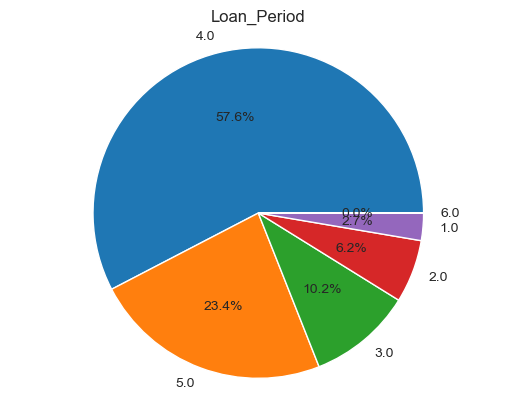

In [199]:
plt.pie(df["Loan_Period"].value_counts().values,labels=df["Loan_Period"].value_counts().index,autopct="%1.1f%%")
plt.axis("equal")
plt.title("Loan_Period")
plt.show()  


57% tổng số khách hàng của ngân hàng có xu hướng trả khoản vay trong vòng 4 năm và chỉ có một khách hàng vay trong vòng 6 năm

In [200]:
# Thiết lập giao diện đồ họa

sns.set_style('darkgrid')

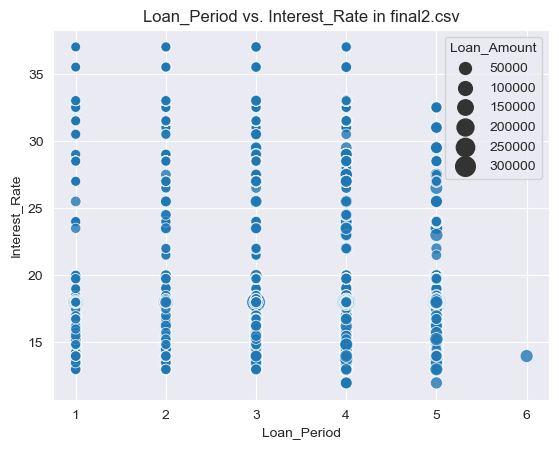

In [201]:
sns.scatterplot(data=df, x='Loan_Period', y='Interest_Rate' ,
                size='Loan_Amount', sizes=(50, 200), alpha=0.8, palette='muted')
plt.title('Loan_Period vs. Interest_Rate in final2.csv')
plt.show()

In [202]:
#Cột đếm số 0 và 1 cột Approved

In [203]:
df.groupby("Approved")[["ID"]].count()

,ID
Approved,
0,67142
1,937


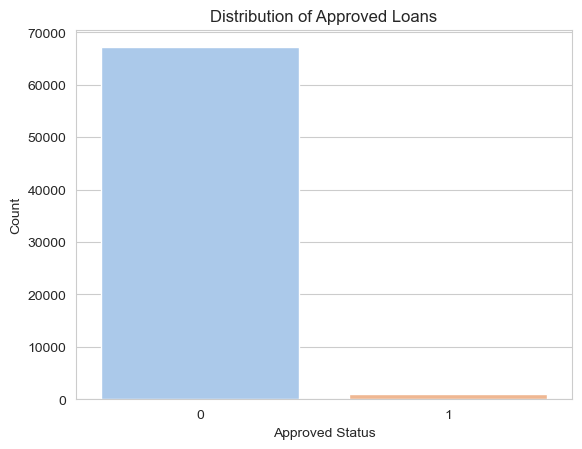

In [204]:
# Thiết lập giao diện đồ họa
sns.set_style('whitegrid')

# Vẽ biểu đồ countplot
ax = sns.countplot(x='Approved', data=df, palette='pastel')

# Thiết lập tiêu đề và nhãn cho biểu đồ
ax.set_title('Distribution of Approved Loans')
ax.set_xlabel('Approved Status')
ax.set_ylabel('Count')

# Hiển thị biểu đồ
plt.show()


In [205]:
# Biểu đồ barplot Approved và Monthly_Income



In [206]:
df.groupby("Approved")[["Monthly_Income"]].mean()

,Monthly_Income
Approved,
0,4845.424710
1,5868.270971


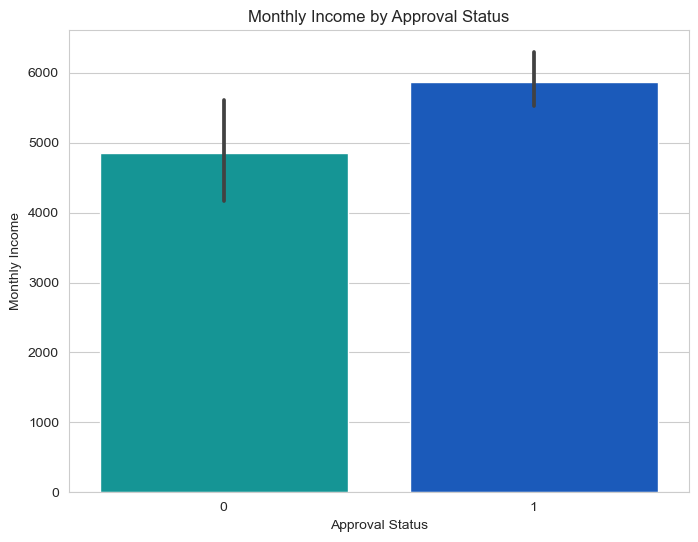

In [207]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Vẽ biểu đồ bar
sns.barplot(x="Approved", y="Monthly_Income", data=df, palette="winter_r")

# Thêm tiêu đề và tên trục
plt.title("Monthly Income by Approval Status")
plt.xlabel("Approval Status")
plt.ylabel("Monthly Income")

# Hiển thị biểu đồ
plt.show()


In [208]:
# Employer_Category1

In [209]:
df["Employer_Category1"].value_counts()

A    36587
B    17566
C    13926
Name: Employer_Category1, dtype: int64

In [210]:
# Đếm số lượng mỗi nhóm trong cột "Employer_Category1"
counts = df["Employer_Category1"].value_counts()

# Tạo biểu đồ tròn tương tác
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts.values)])

# Tùy chỉnh giao diện biểu đồ
fig.update_layout(title="Employer Category 1",
                  title_x=0.5,
                  width=600,
                  height=400,
                  margin=dict(t=50, b=50, l=50, r=50),
                  legend=dict(title=None, orientation="h", yanchor="bottom", y=-0.2),
                  font=dict(size=14))

# Hiển thị biểu đồ
fig.show()


- Category1 (A) là phổ biến nhất
- Category1 (C) là ít phổ biến nhất

In [211]:
# Barplot Employer_Category1 và Loan_Amount
df.groupby("Employer_Category1")[["Loan_Amount"]].mean()

,Loan_Amount
Employer_Category1,
A,33382.348922
B,33951.667995
C,34954.330030


<Figure size 900x600 with 0 Axes>

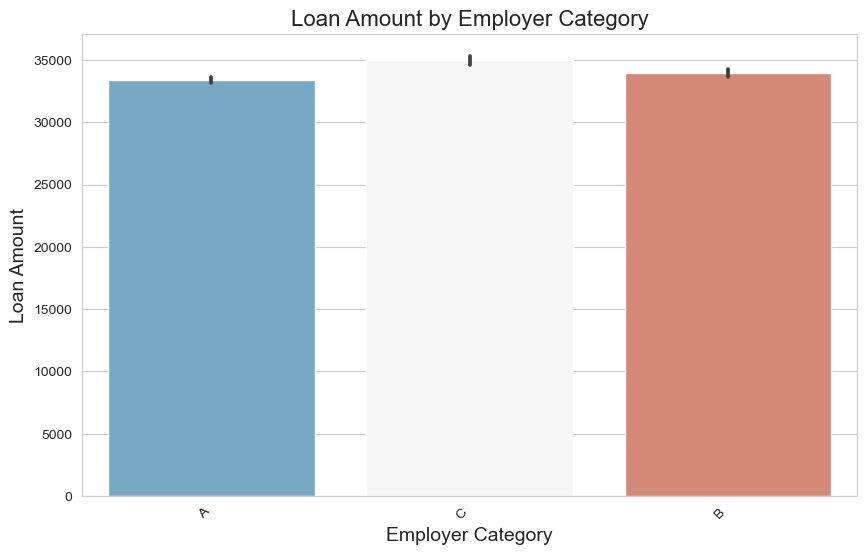

In [212]:
plt.figure(figsize=[9,6])
plt.figure(figsize=[10,6])
sns.barplot(x="Employer_Category1",y="Loan_Amount",data=df,palette="RdBu_r")
plt.title("Loan Amount by Employer Category", fontsize=16)
plt.xlabel("Employer Category", fontsize=14)
plt.ylabel("Loan Amount", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.show() 

Loại C là loại khách hàng có khoản vay lớn nhất, trong khi cả loại A và B đều giống nhau

In [213]:
# Barplot của Employer_Category1 và Monthly_Income
df.groupby("Employer_Category1")[["Monthly_Income"]].mean()

 


,Monthly_Income
Employer_Category1,
A,5388.375374
B,4670.317801
C,3708.658875


-Danh mục C là danh mục khách hàng có thu nhập hàng tháng thấp nhất

-Khách hàng có thu nhập hàng tháng cao nhất thấp nhất về giá trị số tiền vay

In [214]:
#Employer_Category2

In [215]:
df["Employer_Category2"].value_counts()


4.0    60479
1.0     4108
2.0     1888
3.0     1604
Name: Employer_Category2, dtype: int64

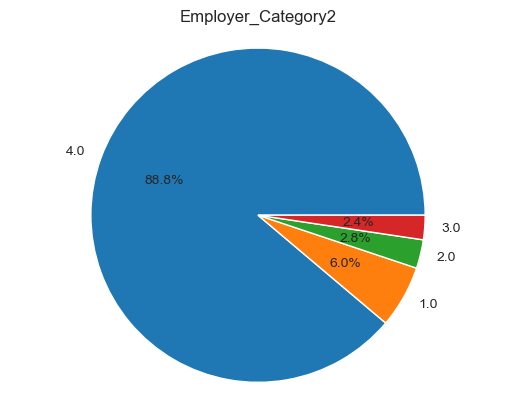

In [216]:
plt.pie(df["Employer_Category2"].value_counts().values,labels=df["Employer_Category2"].value_counts().index,autopct="%1.1f%%")
plt.axis("equal")
plt.title("Employer_Category2")
plt.show()    


In [217]:
# Biểu đồ trực quang hóa dữ liệu của Employer_Category2 và Loan_Amount

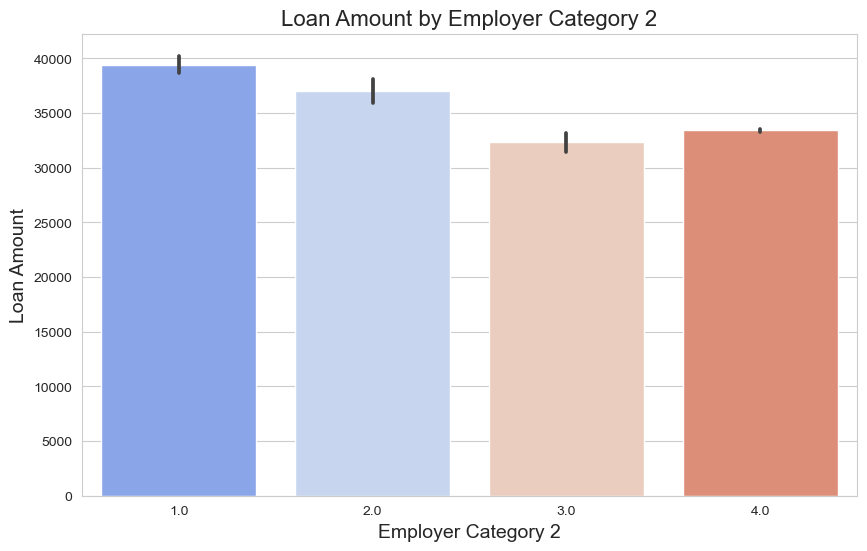

In [218]:
df.groupby("Employer_Category2")[["Loan_Amount"]].mean()
sns.set_style('whitegrid')  # thiết lập phong cách cho biểu đồ

plt.figure(figsize=(10, 6))  # thiết lập kích thước cho biểu đồ

# vẽ biểu đồ cột dọc với màu gradient
sns.barplot(x='Employer_Category2', y='Loan_Amount', data=df, palette='coolwarm')

# thiết lập tiêu đề và chú thích trục
plt.title('Loan Amount by Employer Category 2', fontsize=16)
plt.xlabel('Employer Category 2', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)

plt.show()


Danh mục (1.0) là danh mục khách hàng có khoản vay lớn nhất, trong khi danh mục (3.0) có khoản vay nhỏ nhất

In [219]:
# Biểu đồ trực quang hóa dữ liệu của Employer_Category2 và Monthly_Income

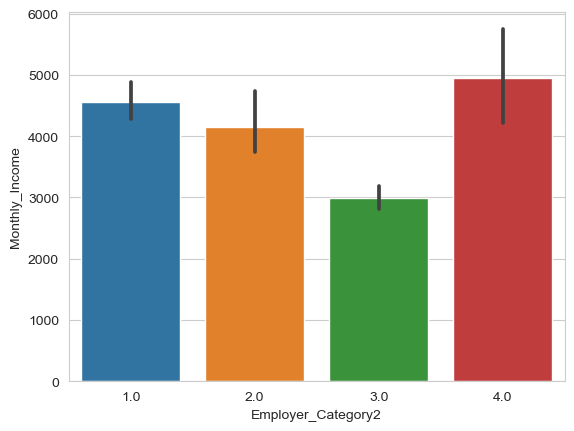

In [220]:
df.groupby("Employer_Category2")[["Monthly_Income"]].mean()
sns.barplot(x="Employer_Category2",y="Monthly_Income",data=df)
plt.show() 

Nhóm khách hàng thứ 3 có thu nhập bình quân tháng thấp nhất và giá trị khoản vay bình quân thấp nhất

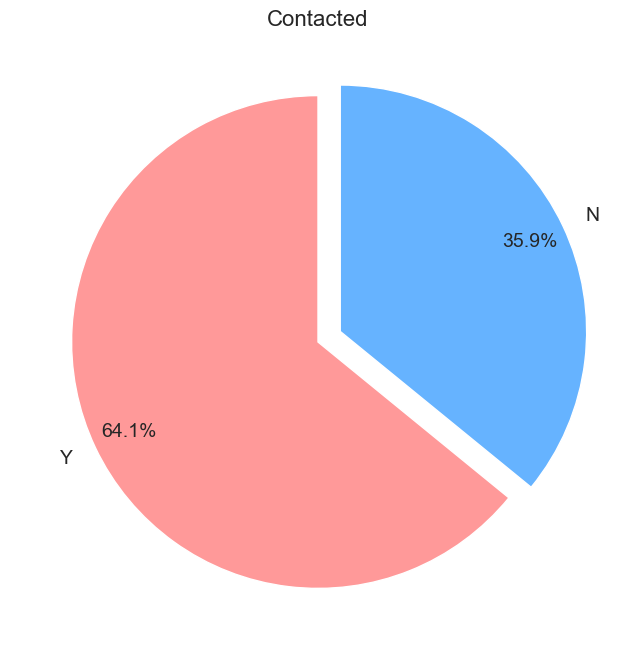

In [221]:
#Contacted
# Tính tỉ lệ phần trăm
counts = df["Contacted"].value_counts()
labels = counts.index
values = counts.values
percentages = [100*value/sum(values) for value in values]

# Thiết lập các tham số cho pie chart
fig, ax = plt.subplots(figsize=(8, 8))
explode = (0, 0.1)  # phần tách ra
colors = ['#ff9999','#66b3ff']  # màu sắc
ax.pie(percentages, colors=colors, labels=labels, autopct='%1.1f%%',
        startangle=90, pctdistance=0.85, explode=explode, textprops={'fontsize': 14})
ax.set_title("Contacted", fontsize=16)

plt.show()

<AxesSubplot:xlabel='City_Category', ylabel='Monthly_Income'>

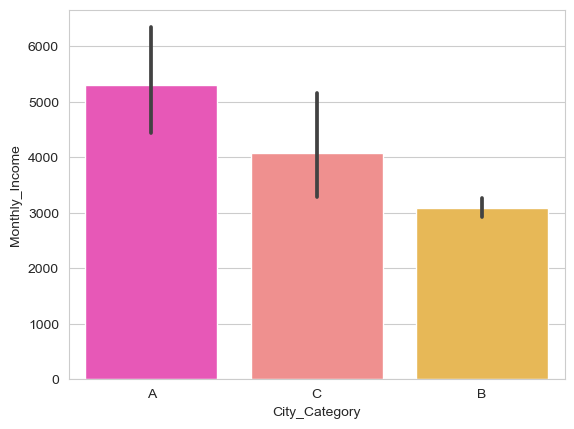

In [222]:
# City_Category và Monthly_Income
df.groupby("City_Category")[["Monthly_Income"]].mean()
sns.barplot(x="City_Category",y="Monthly_Income",data=df,palette="spring")

Khách hàng sống ở thành phố A có thu nhập hàng tháng cao nhất

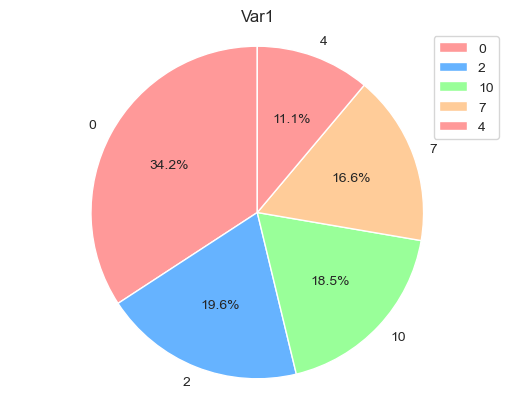

In [223]:
# Var1
df["Var1"].value_counts().sort_values()
df["Var1"].dropna().unique()

labels = df["Var1"].value_counts().index
sizes = df["Var1"].value_counts().values
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)

# Add legend
ax1.legend(labels=labels, loc="best")

plt.axis('equal')
plt.title("Var1")
plt.show()

# Bivariate Analysis

In [224]:
# Employer_Category1,Approved với EMI

In [225]:
df.groupby(["Employer_Category1","Approved"])[["EMI"]].mean()

EMI
Employer_Category1 Approved            
A                  0         938.548287
                   1         972.910145
B                  0         941.043005
                   1         972.176282
C                  0         944.680639
                   1         990.396429

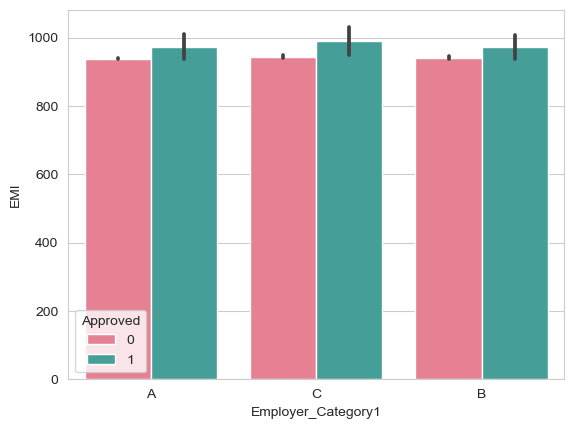

In [226]:
sns.barplot(x="Employer_Category1",y="EMI",data=df,hue="Approved",palette="husl")
plt.show() 

- Hầu hết người sử dụng lao động Loại 1 trả tiền Đóng EMI trong trường hợp khoản vay bị từ chối
- Nhà tuyển dụng Loại 1 (C) là cao nhất trong EMI trong trường hợp khoản vay được chấp nhận

<AxesSubplot:xlabel='Employer_Category1', ylabel='Loan_Amount'>

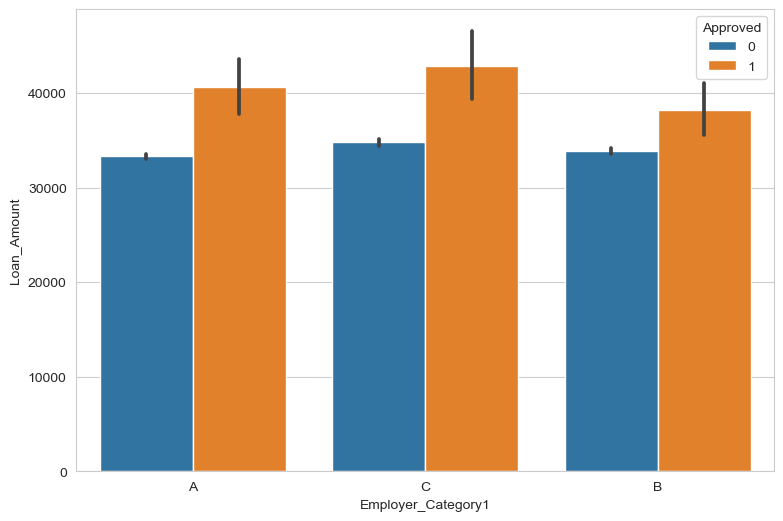

In [227]:
# Employer_Category1,Approved với Loan_Amount
df.groupby(["Employer_Category1","Approved"])[["Loan_Amount"]].mean()
plt.figure(figsize=[9,6])
sns.barplot(x="Employer_Category1",y="Loan_Amount",data=df,hue="Approved")

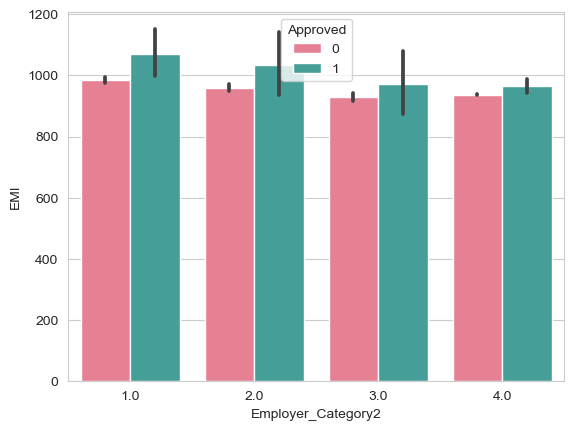

In [228]:
# Employer_Category2,Approved với EMI
df.groupby(["Employer_Category2","Approved"])[["EMI"]].mean()
sns.barplot(x="Employer_Category2",y="EMI",data=df,hue="Approved",palette="husl")
plt.show()  

Nhóm khách hàng thứ nhất có giá trị phí bảo hiểm bình quân hàng tháng cao nhất trong trường hợp từ chối và chấp nhận. Điều này là do danh mục đầu tiên là cao nhất trong các giá trị cho vay trung bình

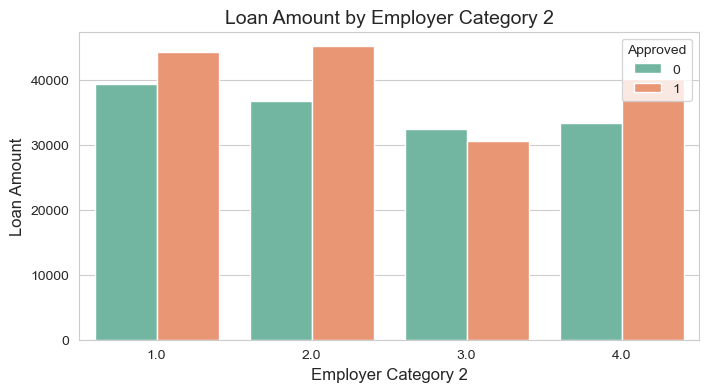

In [229]:
#Employer_Category2,Approved với Loan_Amount
df.groupby(["Employer_Category2","Approved"])[["Loan_Amount"]].mean()
plt.figure(figsize=[8,4])
sns.barplot(x="Employer_Category2", y="Loan_Amount", data=df, hue="Approved", palette="Set2", ci=None)
plt.title("Loan Amount by Employer Category 2", fontsize=14)
plt.xlabel("Employer Category 2", fontsize=12)
plt.ylabel("Loan Amount", fontsize=12)
plt.legend(title="Approved", loc="best")
plt.show()

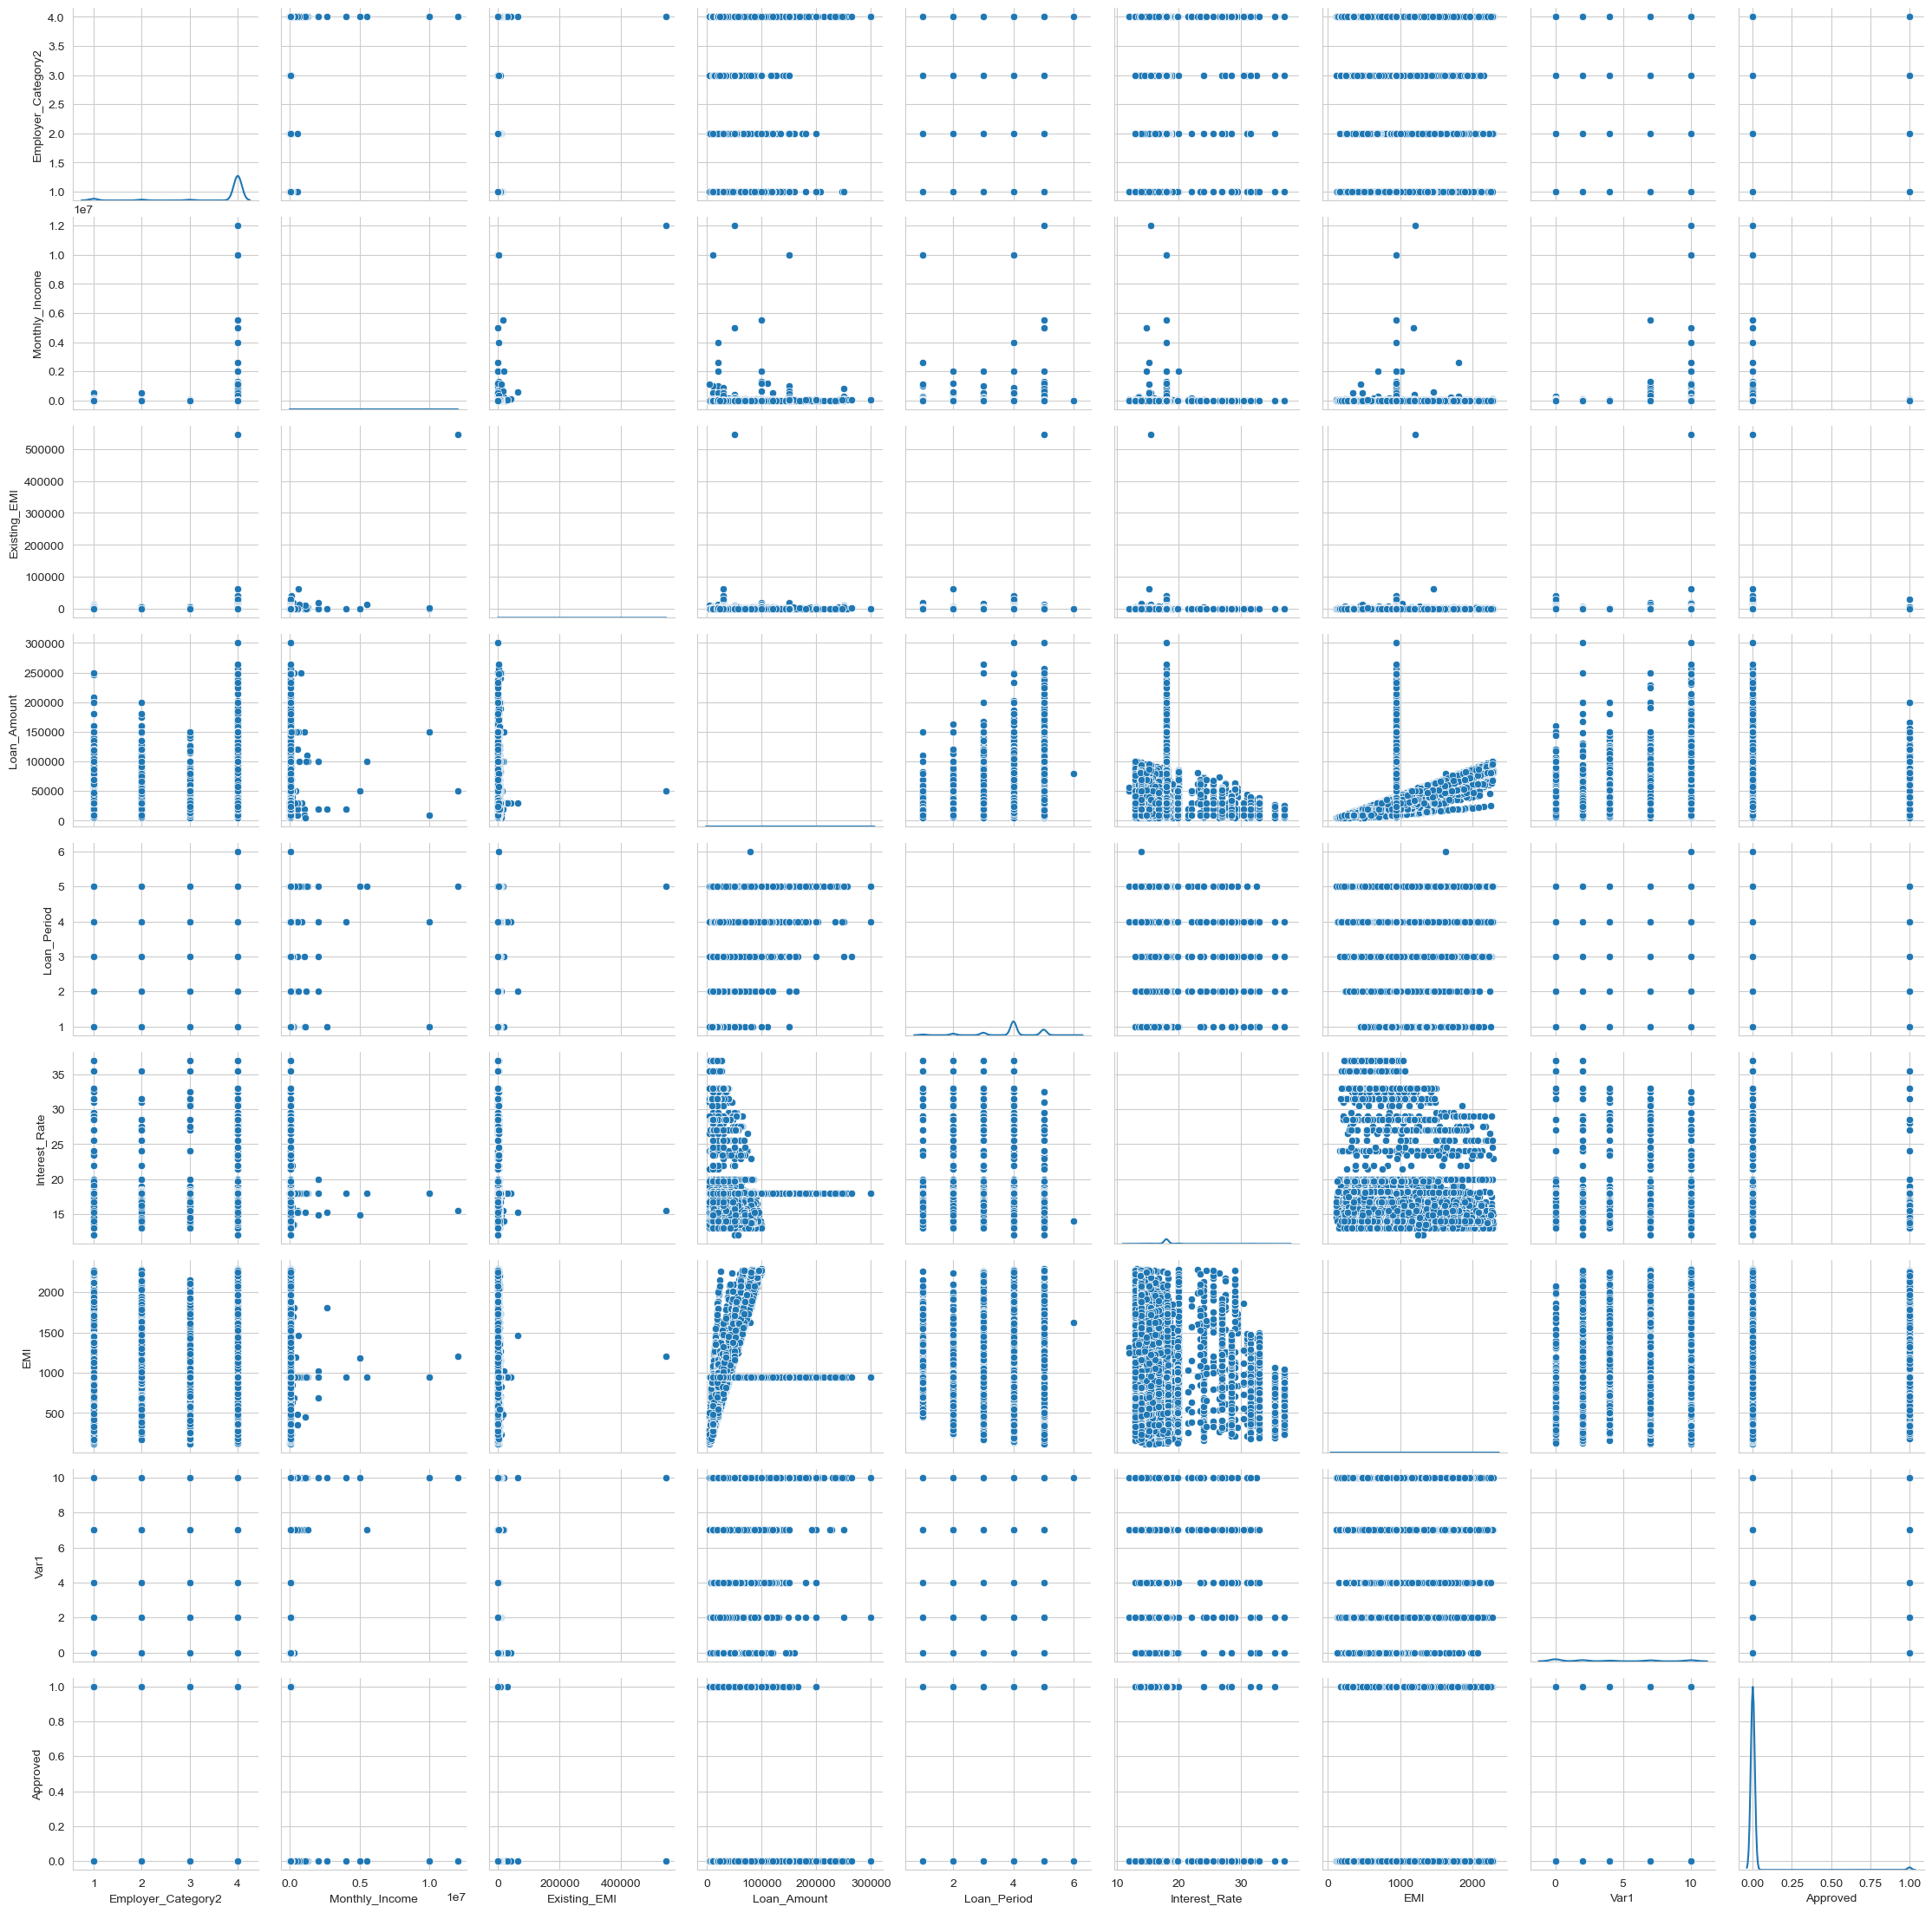

In [230]:
x=sns.PairGrid(df)
x=x.map_diag(sns.kdeplot)
x=x.map_offdiag(sns.scatterplot)

<AxesSubplot:>

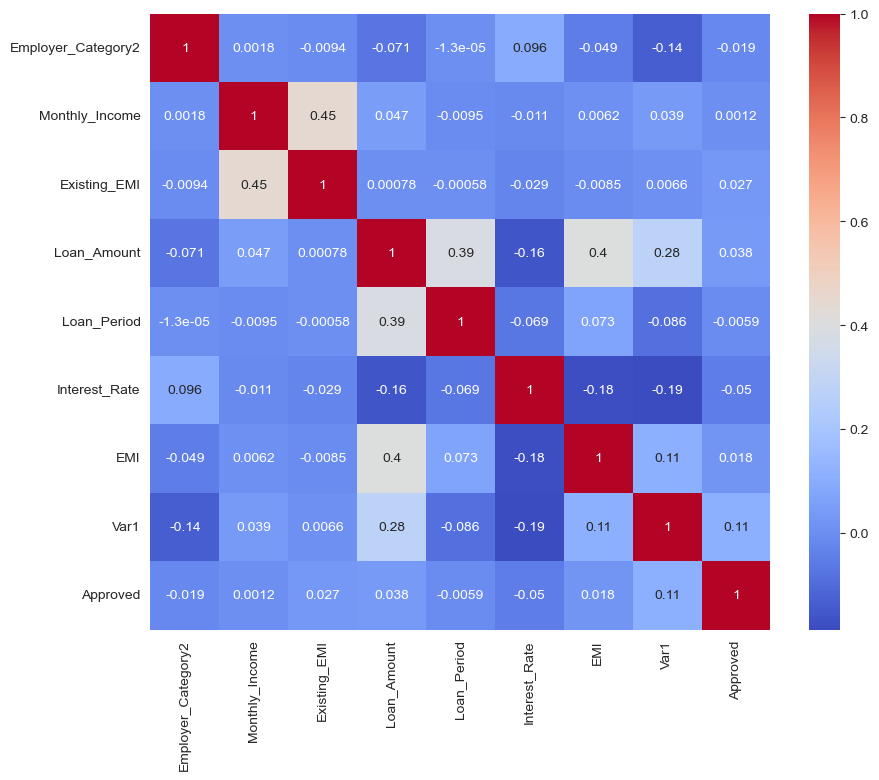

In [231]:
plt.figure(figsize=[10,8])
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

- Có mối tương quan tích cực mạnh mẽ giữa EMI và Số tiền cho vay

# Analysis Question

1) Giới tính của người nộp đơn thường xuyên nhất là gì? ?

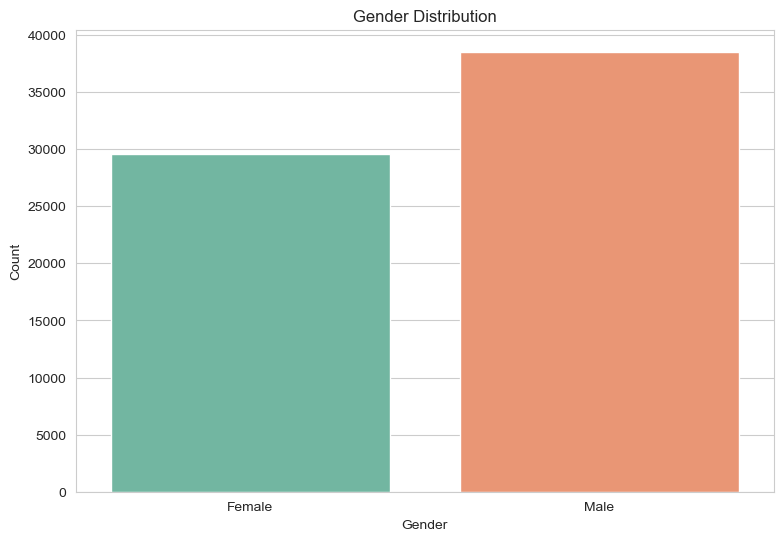

In [232]:
df.groupby("Gender")[["ID"]].count()
sns.set_style("whitegrid") # thiết lập style cho biểu đồ
plt.figure(figsize=[9,6])
sns.countplot(x="Gender",data=df, palette="Set2")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


- Hơn một nửa khách hàng của ngân hàng là nam giới
- Số lượng khách hàng nam nhiều hơn nữ

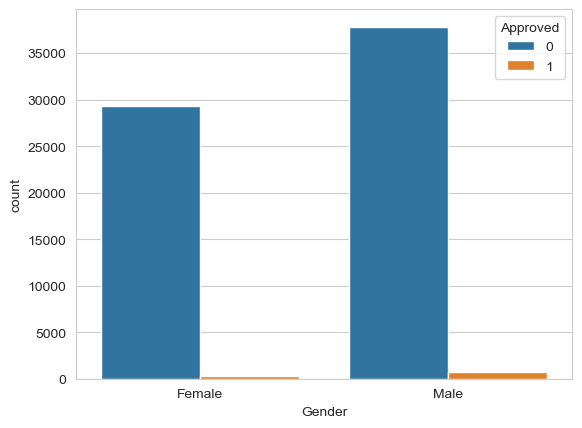

In [233]:
df.groupby(["Gender","Approved"])[["ID"]].count()
sns.countplot(x="Gender",hue="Approved",data=df)
plt.show()            

- Lượng khách hàng nam của ngân hàng vay nhiều hơn khách hàng nữ

2) Thu nhập trung bình hàng tháng của mỗi giới tính là bao nhiêu?

In [234]:
n=df.groupby("Gender")[["Monthly_Income"]].mean()
n


,Monthly_Income
Gender,
Female,2957.057255
Male,6318.155893


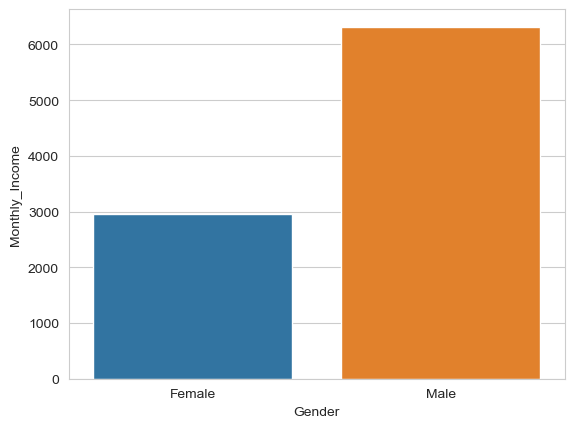

In [235]:
sns.barplot(x=n.index,y=n["Monthly_Income"])
plt.show() 

- Thu nhập trung bình hàng tháng của nam giới cao hơn và do đó họ dễ chấp nhận các khoản vay hơn

3) Số tiền cho vay có ảnh hưởng đến EMI không?

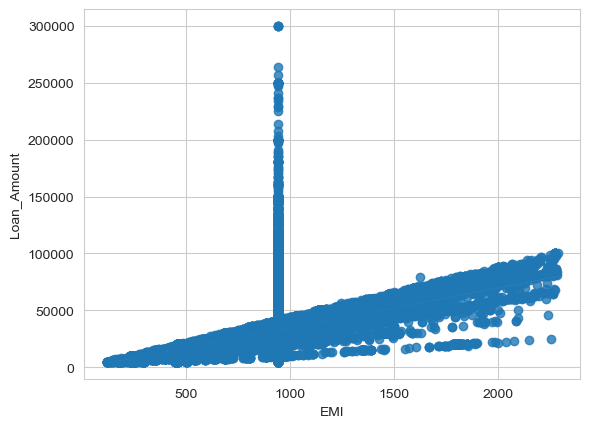

In [236]:
sns.regplot(x="EMI",y="Loan_Amount",data=df)
plt.show()

- Có mối tương quan thuận giữa Số tiền cho vay và EMI

4) Giá trị khoản vay lớn nhất được thực hiện bởi khách hàng ở mọi thành phố là bao nhiêu?

In [237]:
v=df.groupby("City_Category")[["Loan_Amount"]].max()
v

,Loan_Amount
City_Category,
A,300000.0
B,300000.0
C,250000.0


<AxesSubplot:xlabel='City_Category', ylabel='Loan_Amount'>

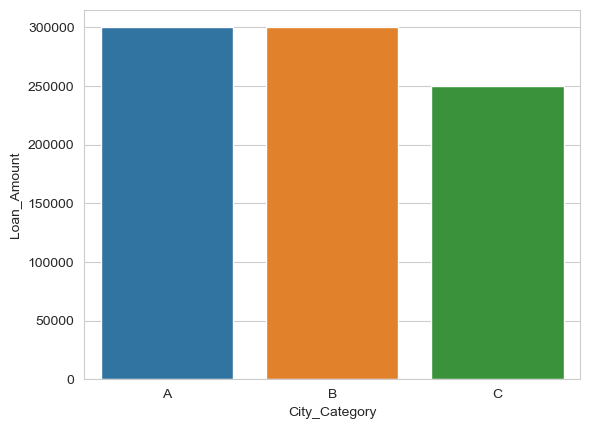

In [238]:
sns.barplot(x=v.index,y=v["Loan_Amount"])


5) Tổng thu nhập hàng tháng của khách hàng từ mỗi thành phố là bao nhiêu?

In [239]:
v=df.groupby("City_Category")[["Monthly_Income"]].sum()
v

,Monthly_Income
City_Category,
A,261542007.4
B,22141113.4
C,47146955.0


<AxesSubplot:xlabel='City_Category', ylabel='Monthly_Income'>

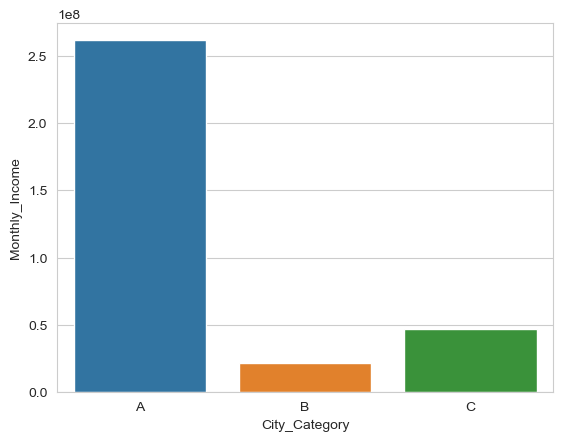

In [240]:
sns.barplot(x=v.index,y=v["Monthly_Income"])

6) Loại ngân hàng chính thường xuyên nhất là gì?

In [241]:
x=df.groupby("Primary_Bank_Type")[["ID"]].count()
x

,ID
Primary_Bank_Type,
G,20249
P,47830


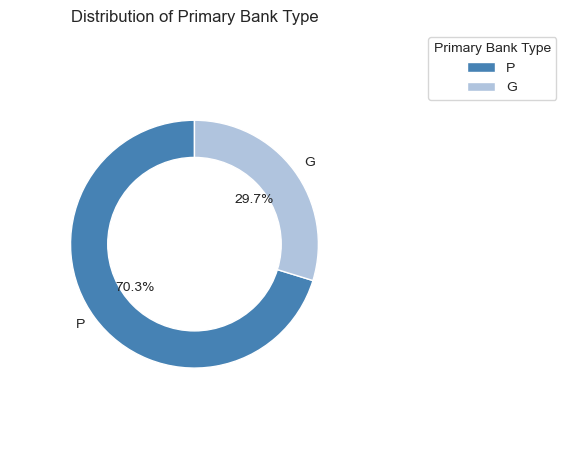

In [242]:
# Tạo màu sắc cho pie chart
colors = ['steelblue', 'lightsteelblue']

# Vẽ pie chart với màu sắc và chú thích tương ứng
plt.pie(df["Primary_Bank_Type"].value_counts().values, labels=df["Primary_Bank_Type"].value_counts().index, 
        autopct="%1.1f%%", colors=colors, startangle=90)
plt.legend(title="Primary Bank Type", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))

# Tạo hình tròn giả để tạo thành pie chart với đường viền trắng
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Tạo tiêu đề cho biểu đồ
plt.title("Distribution of Primary Bank Type")

plt.axis("equal")
plt.tight_layout()
plt.show()


7) Danh mục nguồn cho vay được chấp nhận và từ chối nhiều nhất?

In [243]:
df["Source_Category"].value_counts()

B    29387
G    25908
C    10848
E     1033
D      464
F      436
A        3
Name: Source_Category, dtype: int64

In [244]:
x=df.groupby(["Source_Category","Approved"])[["ID"]].count()
x

ID
Source_Category Approved       
A               0             3
B               0         28914
                1           473
C               0         10736
                1           112
D               0           464
E               0          1018
                1            15
F               0           432
                1             4
G               0         25575
                1           333

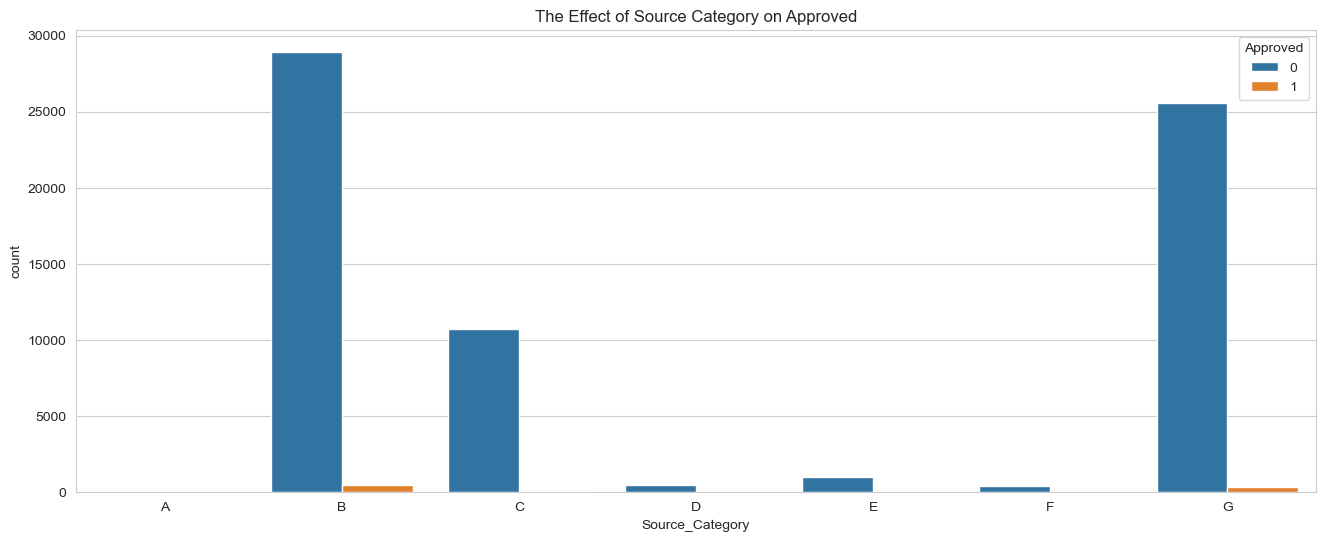

In [245]:
plt.figure(figsize=[16,6])
sns.countplot(x="Source_Category",data=df,hue="Approved",order=["A","B","C","D","E","F","G"])
plt.title("The Effect of Source Category on Approved")
plt.show()

- Danh mục nguồn (B) bị từ chối nhiều nhất đối với Khoản vay

8) Giới tính nào được chấp nhận nhất?

In [246]:
df.groupby(["Gender","Approved"])[["ID"]].count()

ID
Gender Approved       
Female 0         29306
       1           239
Male   0         37836
       1           698

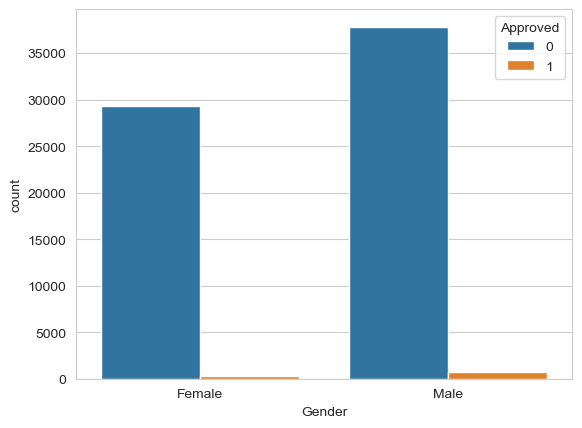

In [247]:
sns.countplot(x="Gender", hue="Approved", data=df)
plt.show()


- Lượng khách hàng nam của ngân hàng vay nhiều hơn khách hàng nữ

In [248]:
df["Source"].unique()

array(['S122', 'S143', 'S134', 'S133', 'S159', 'S137', 'S127', 'S144',
       'S123', 'S156', 'S151', 'S153', 'S124', 'S161', 'S139', 'S154',
       'S157', 'S162', 'S141', 'S158', 'S129', 'S136', 'S130', 'S138',
       'S155', 'S150', 'S160', 'S140'], dtype=object)

In [249]:
df[["Primary_Bank_Type","Contacted"]]   

,Primary_Bank_Type,Contacted
0,P,N
1,P,Y
2,G,Y
3,G,Y
4,P,Y
...,...,...
69713,P,N
69714,P,N
69715,P,Y
69716,P,Y


Primary_Bank_Type: P

In [250]:
df= df[df['Primary_Bank_Type'] == 'P']
df

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,...,N,S122,G,0.0,30000.0,4.0,18.00,941.0,0,0
1,APPD40611263344,Male,7/12/1986,4/7/2016,C10003,A,COM0000002,C,1.0,3500.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,...,Y,S134,B,2500.0,50000.0,2.0,18.00,941.0,10,0
5,APPI90914237819,Female,23/12/88,1/7/2016,C10402,C,COM0007740,A,4.0,7000.0,...,N,S133,B,0.0,30000.0,4.0,18.00,941.0,0,0
7,APPL20820172146,Female,12/11/1990,3/7/2016,C10003,A,COM0016738,A,4.0,3000.0,...,Y,S133,B,0.0,30000.0,3.0,18.25,1088.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69713,APPU90955789628,Female,31/07/83,30/09/16,C10006,A,COM0000010,A,1.0,4900.0,...,N,S122,G,0.0,30000.0,4.0,18.00,941.0,10,0
69714,APPV80989824738,Female,27/01/71,30/09/16,C10116,C,COM0045789,A,4.0,7190.1,...,N,S122,G,1450.0,30000.0,4.0,18.00,941.0,7,0
69715,APPW50697209842,Female,1/2/1992,30/09/16,C10022,B,COM0013284,C,4.0,1600.0,...,Y,S122,G,0.0,24000.0,4.0,35.50,943.0,2,0
69716,APPY50870035036,Male,27/06/78,30/09/16,C10002,A,COM0000098,C,3.0,9893.0,...,Y,S122,G,1366.0,80000.0,5.0,18.00,941.0,10,0


# APPLICATION OF MACHINE LEARNING

Vectorise Features

In [161]:
#Tạo danh sách Category Feature 
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

#Tạo danh sách Numerical Feature
num_cols = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical features:", cat_cols)
print("Numerical features:", num_cols)

Categorical features: ['ID', 'Gender', 'DOB', 'Lead_Creation_Date', 'City_Code', 'City_Category', 'Employer_Code', 'Employer_Category1', 'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type', 'Contacted', 'Source', 'Source_Category']
Numerical features: ['Employer_Category2', 'Monthly_Income', 'Existing_EMI', 'Loan_Amount', 'Loan_Period', 'Interest_Rate', 'EMI', 'Var1', 'Approved']


In [162]:
for category in ['Gender','City_Category','Employer_Category1','Primary_Bank_Type','Contacted','Source_Category']:
  onehots = pd.get_dummies(df[category], prefix=category)
  df = df.join(onehots)
df.iloc[0:5,19:] # 5 first rows (instances), from the 19th column to the last one

,EMI,Var1,Approved,Gender_Female,Gender_Male,City_Category_A,City_Category_B,City_Category_C,Employer_Category1_A,Employer_Category1_B,...,Primary_Bank_Type_P,Contacted_N,Contacted_Y,Source_Category_A,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G
0,941.0,0,0,1,0,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,1
1,953.0,10,0,0,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
4,941.0,10,0,0,1,1,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0
5,941.0,0,0,1,0,0,0,1,1,0,...,1,1,0,0,1,0,0,0,0,0
7,1088.0,0,0,1,0,1,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0


In [163]:
# drop the original category column (because it is encoded)
df = df.drop(columns=['Gender',
                        'City_Category', 
                        'Employer_Category1', 
                        'Primary_Bank_Type', 
                        'Contacted', 
                        'Source_Category']).copy()
df

,ID,DOB,Lead_Creation_Date,City_Code,Employer_Code,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Source,Existing_EMI,...,Primary_Bank_Type_P,Contacted_N,Contacted_Y,Source_Category_A,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G
0,APPC90493171225,23/07/79,15/07/16,C10001,COM0044082,4.0,2000.0,B001,S122,0.0,...,1,1,0,0,0,0,0,0,0,1
1,APPD40611263344,7/12/1986,4/7/2016,C10003,COM0000002,1.0,3500.0,B002,S122,0.0,...,1,0,1,0,0,0,0,0,0,1
4,APPG60994436641,19/04/85,20/07/16,C10002,COM0001781,4.0,10000.0,B001,S134,2500.0,...,1,0,1,0,1,0,0,0,0,0
5,APPI90914237819,23/12/88,1/7/2016,C10402,COM0007740,4.0,7000.0,B014,S133,0.0,...,1,1,0,0,1,0,0,0,0,0
7,APPL20820172146,12/11/1990,3/7/2016,C10003,COM0016738,4.0,3000.0,B006,S133,0.0,...,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69713,APPU90955789628,31/07/83,30/09/16,C10006,COM0000010,1.0,4900.0,B002,S122,0.0,...,1,1,0,0,0,0,0,0,0,1
69714,APPV80989824738,27/01/71,30/09/16,C10116,COM0045789,4.0,7190.1,B002,S122,1450.0,...,1,1,0,0,0,0,0,0,0,1
69715,APPW50697209842,1/2/1992,30/09/16,C10022,COM0013284,4.0,1600.0,B030,S122,0.0,...,1,0,1,0,0,0,0,0,0,1
69716,APPY50870035036,27/06/78,30/09/16,C10002,COM0000098,3.0,9893.0,B002,S122,1366.0,...,1,0,1,0,0,0,0,0,0,1


Phân phối chuẩn và không chuẩn

In [164]:
from scipy.stats import skew, kurtosis

# Tạo danh sách numerical features có phân phối bình thường
normal_features = []

# Tạo danh sách numerical features không có phân phối bình thường
non_normal_features = []

# Duyệt qua các numerical features
for col in num_cols:
    # Tính skewness và kurtosis của feature
    skewness = skew(df[col])
    kurt = kurtosis(df[col])
    
    # Kiểm tra phân phối của feature
    if abs(skewness) <= 2 and abs(kurt) <= 2:
        normal_features.append(col)
    else:
        non_normal_features.append(col)

# In kết quả
print("Normal distribution features:", normal_features)
print("Non-normal distribution features:", non_normal_features)



Normal distribution features: ['Loan_Period', 'Var1']
Non-normal distribution features: ['Employer_Category2', 'Monthly_Income', 'Existing_EMI', 'Loan_Amount', 'Interest_Rate', 'EMI', 'Approved']


Lấy các feature cho học máy

In [165]:
feature = df.columns[5:7].tolist() + df.columns[9:15].tolist() + df.columns[16:].tolist()

feature

['Employer_Category2',
 'Monthly_Income',
 'Existing_EMI',
 'Loan_Amount',
 'Loan_Period',
 'Interest_Rate',
 'EMI',
 'Var1',
 'Gender_Female',
 'Gender_Male',
 'City_Category_A',
 'City_Category_B',
 'City_Category_C',
 'Employer_Category1_A',
 'Employer_Category1_B',
 'Employer_Category1_C',
 'Primary_Bank_Type_P',
 'Contacted_N',
 'Contacted_Y',
 'Source_Category_A',
 'Source_Category_B',
 'Source_Category_C',
 'Source_Category_D',
 'Source_Category_E',
 'Source_Category_F',
 'Source_Category_G']

In [166]:
transform = normal_features + non_normal_features
x = df[feature]
y = df['Approved']
x

,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Gender_Female,Gender_Male,...,Primary_Bank_Type_P,Contacted_N,Contacted_Y,Source_Category_A,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G
0,4.0,2000.0,0.0,30000.0,4.0,18.00,941.0,0,1,0,...,1,1,0,0,0,0,0,0,0,1
1,1.0,3500.0,0.0,20000.0,2.0,13.25,953.0,10,0,1,...,1,0,1,0,0,0,0,0,0,1
4,4.0,10000.0,2500.0,50000.0,2.0,18.00,941.0,10,0,1,...,1,0,1,0,1,0,0,0,0,0
5,4.0,7000.0,0.0,30000.0,4.0,18.00,941.0,0,1,0,...,1,1,0,0,1,0,0,0,0,0
7,4.0,3000.0,0.0,30000.0,3.0,18.25,1088.0,0,1,0,...,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69713,1.0,4900.0,0.0,30000.0,4.0,18.00,941.0,10,1,0,...,1,1,0,0,0,0,0,0,0,1
69714,4.0,7190.1,1450.0,30000.0,4.0,18.00,941.0,7,1,0,...,1,1,0,0,0,0,0,0,0,1
69715,4.0,1600.0,0.0,24000.0,4.0,35.50,943.0,2,1,0,...,1,0,1,0,0,0,0,0,0,1
69716,3.0,9893.0,1366.0,80000.0,5.0,18.00,941.0,10,0,1,...,1,0,1,0,0,0,0,0,0,1


Xử lí class imbalance

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE  

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
mms = MinMaxScaler()
x_scaled = pd.DataFrame(mms.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(mms.transform(x_test), columns=x_test.columns)
oversample = SMOTE()
x_balanced, y_balanced = oversample.fit_resample(x_scaled, y_train)
x_test_balanced, y_test_balanced = oversample.fit_resample(x_test_scaled, y_test)

In [168]:
# Model Evaluation Classification test
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)
    
    print("Accuracy: ", round(accuracy_score(y_test, y_pred),3))
    print("Precision:",round(precision_score(y_test, y_pred),3))
    print("Recall: ",round(recall_score(y_test, y_pred),3))
    print("F1-Score: ",round(f1_score(y_test, y_pred),3))  
    score = cross_validate(model, x, y, cv=5, scoring='roc_auc', return_train_score=True)

In [169]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
# Train model
clf_under = LogisticRegression()
clf_under.fit(x_balanced,y_balanced)

# Predict on test set
y_pred_under = clf_under.predict(x_balanced)

f1_LogisticRegression = f1_score(y_balanced, y_pred_under)
accuracy_LogisticRegression = accuracy_score(y_balanced, y_pred_under)
recall_LogisticRegression = recall_score(y_balanced, y_pred_under)
precision_LogisticRegression = precision_score(y_balanced, y_pred_under)
# Print evaluation metrics
print('Accuracy:', accuracy_LogisticRegression )
print('Precision:', precision_LogisticRegression)
print('Recall:', recall_LogisticRegression)
print('F1-Score:', f1_LogisticRegression)

Accuracy: 0.7407075886761538
Precision: 0.7243876223341065
Recall: 0.7770731559304548
F1-Score: 0.7498060341672644


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model3 = DecisionTreeClassifier()
model3.fit(x_balanced, y_balanced)
y_predict_D = model3.predict(x_test_balanced)

f1_DecisionTreeClassifier = f1_score(y_test_balanced, y_predict_D)
accuracy_DecisionTreeClassifier = accuracy_score(y_test_balanced, y_predict_D)
recall_DecisionTreeClassifier = recall_score(y_test_balanced, y_predict_D)
precision_DecisionTreeClassifier = precision_score(y_test_balanced, y_predict_D)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test_balanced, y_predict_D)))
print('Precision Score is {:.5}'.format(precision_score(y_test_balanced, y_predict_D)))
print('Recall Score is {:.5}'.format(recall_score(y_test_balanced, y_predict_D)))
print('F1 Score is {:.5}'.format(f1_score(y_test_balanced, y_predict_D)))

Accuracy Score is 0.82322
Precision Score is 0.93867
Recall Score is 0.69162
F1 Score is 0.79643


In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model3 = DecisionTreeClassifier()
model3.fit(x_balanced, y_balanced)
y_predict_D = model3.predict(x_test_balanced)

f1_DecisionTreeClassifier = f1_score(y_test_balanced, y_predict_D)
accuracy_DecisionTreeClassifier = accuracy_score(y_test_balanced, y_predict_D)
recall_DecisionTreeClassifier = recall_score(y_test_balanced, y_predict_D)
precision_DecisionTreeClassifier = precision_score(y_test_balanced, y_predict_D)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test_balanced, y_predict_D)))
print('Precision Score is {:.5}'.format(precision_score(y_test_balanced, y_predict_D)))
print('Recall Score is {:.5}'.format(recall_score(y_test_balanced, y_predict_D)))
print('F1 Score is {:.5}'.format(f1_score(y_test_balanced, y_predict_D)))

Accuracy Score is 0.82534
Precision Score is 0.93844
Recall Score is 0.69637
F1 Score is 0.79948


In [176]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model2 = KNeighborsClassifier()
model2.fit(x_balanced, y_balanced)
y_predict = model2.predict(x_test_balanced)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test_balanced, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test_balanced, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test_balanced, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test_balanced, y_predict)))

f1_KNeighborsClassifier = f1_score(y_test_balanced, y_predict)
accuracy_KNeighborsClassifier = accuracy_score(y_test_balanced, y_predict)
recall_KNeighborsClassifier = recall_score(y_test_balanced, y_predict)
precision_KNeighborsClassifier = precision_score(y_test_balanced, y_predict)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Accuracy Score is 0.70263
Precision Score is 0.87516
Recall Score is 0.4727
F1 Score is 0.61384


Kappa-score


In [179]:
#Tìm Kappa dựa trên DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import cohen_kappa_score

# Khởi tạo mô hình DecisionTreeClassifier
model = DecisionTreeClassifier()

# Fit mô hình với dữ liệu huấn luyện
model.fit(x_balanced, y_balanced)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(x_test_balanced)

# Tính toán Kappa score
kappa_DecisionTreeClassifier = cohen_kappa_score(y_test_balanced, y_pred)

# In ra Kappa score
print('Kappa Score:', kappa_DecisionTreeClassifier)

Kappa Score: 0.638076351016361


In [180]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import cohen_kappa_score

# Khởi tạo mô hình KNeighborsClassifier
model = KNeighborsClassifier()

# Huấn luyện mô hình trên tập dữ liệu cân bằng
model.fit(x_balanced, y_balanced)

# Dự đoán trên tập kiểm tra cân bằng
y_pred = model.predict(x_test_balanced)

# Tính toán Kappa score
kappa_KNeighborsClassifier = cohen_kappa_score(y_test_balanced, y_pred)
print("Kappa score: ", kappa_KNeighborsClassifier)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Kappa score:  0.4052694950067285


In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score

# Khởi tạo mô hình
lr_model = LogisticRegression(max_iter=1000)

# Huấn luyện mô hình trên tập train
lr_model.fit(x_balanced, y_balanced)

# Dự đoán trên tập test
y_pred_lr = lr_model.predict(x_test_balanced)

# Tính toán Kappa Score
kappa_LogisticRegression = cohen_kappa_score(y_test_balanced, y_pred_lr)

print("Kappa Score for Logistic Regression:", kappa_LogisticRegression)

Kappa Score for Logistic Regression: 0.46136411927190313


In [182]:
import pandas as pd

# Tạo một DataFrame chứa các giá trị kappa score và tên của các mô hình
kappa_scores = pd.DataFrame({
    'Model Name': ['Decision Tree Classifier', 'KNeighbors Classifier','Logistic Regression'],
    'Kappa Score': [kappa_DecisionTreeClassifier, kappa_KNeighborsClassifier, kappa_LogisticRegression]
})
kappa_scores


,Model Name,Kappa Score
0,Decision Tree Classifier,0.638076
1,KNeighbors Classifier,0.405269
2,Logistic Regression,0.461364


DataFrame tổng hợp đánh giá mô hình

In [183]:
Fscores = pd.DataFrame({
    'Model Name': ['Decision Tree Classifier', 'KNeighbors Classifier','Logistic Regression'],
    'Kappa Score': [kappa_DecisionTreeClassifier, kappa_KNeighborsClassifier, kappa_LogisticRegression],
    'F1 Score': [f1_DecisionTreeClassifier, f1_KNeighborsClassifier, f1_LogisticRegression],
    'Accuracy': [accuracy_DecisionTreeClassifier, accuracy_KNeighborsClassifier, accuracy_LogisticRegression],
    'Recall': [recall_DecisionTreeClassifier, recall_KNeighborsClassifier, recall_LogisticRegression],
    'Precision': [precision_DecisionTreeClassifier, precision_KNeighborsClassifier, precision_LogisticRegression]
})
Fscores

,Model Name,Kappa Score,F1 Score,Accuracy,Recall,Precision
0,Decision Tree Classifier,0.638076,0.799480,0.825342,0.696367,0.938437
1,KNeighbors Classifier,0.405269,0.613842,0.702635,0.472696,0.875164
2,Logistic Regression,0.461364,0.749806,0.740708,0.777073,0.724388
